# ingest raw data

In [1]:
# settings
wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
print ('scanpy version: {}'.format(sc.__version__))
warnings.filterwarnings('ignore')
%matplotlib inline

# read raw data (expression data) to pandas df
pre_adata = (pd.read_csv('s3://daniel.le-work/MEL_project/DL20190115_big_counts.txt', 
                      index_col=[0])
                .rename(columns = {'gene':'gene_name'})
                .set_index('gene_name'))
cell_names = ['_'.join(x.split('_')[:2]) for x in pre_adata.columns]
pre_adata.columns = cell_names

# read fetal supp data
pre_adata_supp1 = (pd.read_csv('s3://daniel.le-work/MEL_project/DL20190319_fetal_v2.csv')
                  .rename(columns = {'gene':'gene_name'})
                   .set_index('gene_name')
                  )

# read adult supp data
pre_adata_supp2 = (pd.read_csv('s3://daniel.le-work/MEL_project/DL20190417_adult_v2.csv')
                  .rename(columns = {'gene':'gene_name'})
                   .set_index('gene_name')
                  )

# merge with raw
pre_adata = pd.concat([pre_adata, pre_adata_supp1,pre_adata_supp2], axis=1)
cell_names = pre_adata.columns.tolist()

# metadata:
## download lastest from google drive and push to s3
meta_df = pd.read_csv('s3://daniel.le-work/MEL_project/DL20190417_mel_metadata.csv')
meta_df = meta_df.drop(['GWAS_consent', 
                        'sort_info_exported',
                       'sort_date',
                       'plate_order',
                       'sample_number',
                       'plate_status'], axis = 1)
possible_wells = [f'{y}{x}'for y in string.ascii_uppercase[:-10] for x in range(1,25)]
all_wells_df = pd.DataFrame()
for plate in meta_df.plate_barcode:
    well_df = pd.DataFrame({'well':possible_wells})
    well_df['plate_barcode'] = plate
    all_wells_df = pd.concat([all_wells_df, well_df], axis = 0)
    
meta_df = pd.merge(meta_df, all_wells_df, 'left', 'plate_barcode')
meta_df['cell_name'] = [f'{x}_{y}' for x,y in zip(meta_df.well, meta_df.plate_barcode)]

merged_anno = pd.merge(pd.DataFrame({'cell_name':cell_names}), meta_df, 'left', 'cell_name')
merged_anno = merged_anno.set_index('cell_name')


/home/ubuntu/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


scanpy version: 1.4.2


In [2]:
pre_adata

,D6_B003063,L19_B003063,I11_B003063,K17_B003063,K15_B003063,D3_B003063,O12_B003063,F16_B003063,F3_B003063,O22_B003063,...,P7_B002549,P7_B002550,P8_B002522,P8_B002524,P8_B002549,P8_B002550,P9_B002522,P9_B002524,P9_B002549,P9_B002550
gene_name,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,71,0,86,19,0,30
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2,0,0,0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,207,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
ZYG11B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,80,0,0,0
ZYX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
def module_look_up(input_adata):
    MEL_module = ['PMEL','TYR','DCT','MITF','TYRP1','SOX10']
    bKRT_module = ['ITGB4','KRT14','KRT5']
    sbKRT_module = ['KRT1','DSG1','DSC3']
    T_cell = ['CD2','CD3D','CD3E','CD3G']
    B_cell = ['IGLL5','MZB1','JCHAIN','DERL3','SDC1','MS4A1','BANK1','PAX5','CD79A',
             'PRDM1','XBP1','IRF4','MS4A1','IRF8']
    langerhans_cell = ['CD207','CD1A'] # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC351325/
    merkel_cell = ['KRT20','ATOH1']# https://www.ncbi.nlm.nih.gov/pubmed/7769257, http://dev.biologists.org/content/141/24/4690
    mast_cell = ['CMA1', 'MS4A2', 'TPSAB1', 'TPSB2']
    monocyte = ['PTPRC', 'CD14','FCGR3A'] #https://www.biolegend.com/essential_markers
    fibroblast = ['COL1A1','COL3A1','TWIST1'] # https://www.ncbi.nlm.nih.gov/pubmed/27113414
    eccrine_cell = ['FOXC1','RUNX1','S100P']

    # compile modules
    modules_dict = {'MEL_module':MEL_module,
                    'bKRT_module':bKRT_module,
                    'sbKRT_module':sbKRT_module,
                    'langerhans_cell':langerhans_cell,
                    'merkel_cell':merkel_cell,
                    'mast_cell':mast_cell, 
                    'T_cell':T_cell, 
                    'monocyte':monocyte, 
                    'fibroblast':fibroblast, 
                    'eccrine':eccrine_cell,
                   }

    input_adata.obs['cell'] = input_adata.obs.index.tolist()
    input_adata.obs['cell'] = (input_adata
                              .obs['cell']
                              .astype(str)
                              .astype(CategoricalDtype(input_adata.obs['cell'].tolist())))
    cat, exp_df = prepare_dataframe(input_adata,
                     var_names = [x for key,value in modules_dict.items() for x in value],
                     groupby = 'cell')
    exp_df = exp_df.rank(pct=True, axis=0, method = 'min') # ranked expression per cell
    exp_df = exp_df.rank(pct=True, axis=1, method = 'min') # ranking ranked expression per gene (normalizing contribution of each gene)

    for key,value in modules_dict.items():
        input_adata.obs[key] = exp_df.loc[:,value].mean(axis=1)
        sc.pl.umap(input_adata, color=[key], cmap = 'magma', palette = 'tab20')

    sc.pl.umap(input_adata, color=['louvain'], 
               ncols = 1, cmap = 'nipy_spectral', palette = 'tab20', legend_loc = 'on data')


# compile raw data

In [72]:
raw_adata = create_adata(pre_adata)
raw_adata.var['ribo'] = raw_adata.var_names.str.startswith(('RPL','RPS'))
raw_adata.var['ercc'] = np.array([True if 'ERCC' in x else False for x in raw_adata.var_names.tolist()])
# sc.pp.calculate_qc_metrics(raw_adata, feature_controls=['ribo','ercc'], inplace=True)
anno_dict = {'age':'age',
             'age_bin':'age_bin',
             'plate_barcode':'plate',
             'general_location':'general_location',
             'anatomical_location':'anatomical_location',
             'race':'race',
             'sex':'sex',
             'sample_color':'color',
             'patient_id':'patient'}
append_anno(raw_adata, merged_anno, anno_dict)
technical_filters(raw_adata, min_genes=1000)
raw_adata = remove_ercc(raw_adata) 
raw_adata.raw = sc.pp.log1p(raw_adata, copy=True) # freeze raw state

Ingest raw data...
	Cells: 14370, Genes: 26577
Append annotations...
	Cells: 14370, Genes: 26577
Remove low-quality cells/genes...
	Initial:
	Cells: 14370, Genes: 26577
	Result:
	Cells: 10153, Genes: 24627
Remove ERCC genes...
Filtered genes: 89
	Cells: 10153, Genes: 24538


# append metadata to raw adata

## cycling cells
ref: https://www.biorxiv.org/content/biorxiv/early/2019/02/03/526848.full.pdf 
high = G2/M, low = G1/S

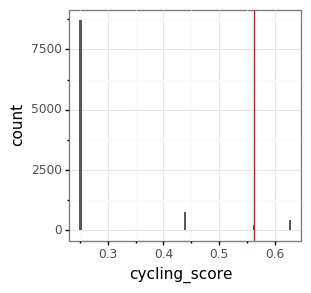

<ggplot: (-9223363297160350355)>

In [73]:
cycling_module = ['TOP2A','CDK1','UBE2C','CDT1'] # 4 genes positively correlate
input_adata = raw_adata
threshold = 95

input_adata.obs['cell'] = input_adata.obs.index.tolist()
input_adata.obs['cell'] = (input_adata
                          .obs['cell']
                          .astype(str)
                          .astype(CategoricalDtype(input_adata.obs['cell'].tolist())))
cat, exp_df = prepare_dataframe(input_adata,
                 var_names = cycling_module,
                 groupby = 'cell')
exp_df = exp_df.rank(pct=True, axis=1, method = 'min') # ranking per cell

input_adata.obs['cycling_score'] = exp_df.loc[:,cycling_module].mean(axis=1)
omit_names = (input_adata[input_adata.obs.cycling_score > np.percentile(input_adata.obs.cycling_score.values, threshold)]
              .obs
              .index
              .tolist()
             )

input_adata.obs['cycling_cell'] = ['G2_M' if x in set(omit_names) else 'G1_S' for x in input_adata.obs.index]

cycling_df = input_adata.obs.loc[:,['n_genes','cycling_score']]

plotnine.options.figure_size = (3,3)
plot_df = (ggplot(cycling_df)
           + theme_bw()
           + geom_histogram(aes('cycling_score'))
           + geom_vline(aes(xintercept = np.percentile(input_adata.obs.cycling_score.values, threshold)), color = 'red')
          )
plot_df


## back-scatter

In [74]:
bucket = 'daniel.le-work'
prefix = 'MEL_project/facs_data'
suffix = '.csv'
paths = get_s3path_list(bucket, prefix, suffix)

master_bsc = pd.DataFrame()
for path in paths:
    pathoi = path
    pathoi_plate = pathoi.split('/')[-1].split('_')[0].split('-')[0]
    tmpdf = pd.read_csv(pathoi).loc[:,['BSC-A','FSC-A','Index']]
    tmpdf['plate'] = pathoi_plate
    
    master_bsc = master_bsc.append(tmpdf)
    
master_bsc['code'] = [f'{x}_{y}' for x,y in zip(master_bsc.Index, master_bsc.plate)]
master_bsc = master_bsc.drop_duplicates(subset=['code'])
# append results
# join bsc to adata index order
for input_adata in [raw_adata]:
    mergedf = pd.merge(pd.DataFrame({'code':input_adata.obs.index.values}), 
                       master_bsc.loc[:,['BSC-A','FSC-A','code']], 'left', 'code')
    mergedf['plate'] = [x.split('_')[-1] for x in mergedf.code]
    mergedf['well'] = [x.split('_')[0] for x in mergedf.code]
    mergedf['pass'] = np.isnan(mergedf['BSC-A'])
    input_adata.obs['bsc'] = mergedf['BSC-A'].values
    input_adata.obs['fsc'] = mergedf['FSC-A'].values
    

## FACS gates

In [75]:
input_adata = raw_adata

gate_labels = pd.read_csv('s3://daniel.le-work/MEL_project/gate_assignments.csv', index_col = 0)
gate_labels.columns = [x.split('-')[0] for x in gate_labels.columns]
gate_labels = (gate_labels
               .iloc[:, [idx for idx,x in enumerate(gate_labels
                                                    .columns
                                                    .duplicated(keep='first')) if x == False]]
                )
gate_labels = pd.melt(gate_labels.reset_index(), id_vars='index')
gate_labels['cell_id'] = [f'{y}_{x}' for x,y in zip(gate_labels['variable'], gate_labels['index'])]
gate_labels = pd.merge(pd.DataFrame({'cell_id':input_adata.obs.index}),
                       gate_labels.loc[:,['cell_id','value']],
                       'left',
                       'cell_id'
                      )

input_adata.obs['gate_label'] = gate_labels['value'].values
input_adata.obs['gate_label'] = input_adata.obs['gate_label'].replace(np.nan, 'null')
input_adata.obs['gate_label'] = (input_adata.obs['gate_label']
                                 .astype(str)
                                 .astype(CategoricalDtype(['a6high', 'a6mid', 'a6low', 'ckitpos', 'null'],ordered=True))
                                )


# Filters

## initial clustering

... storing 'age_bin' as categorical
... storing 'plate' as categorical
... storing 'general_location' as categorical
... storing 'anatomical_location' as categorical
... storing 'race' as categorical
... storing 'sex' as categorical
... storing 'color' as categorical
... storing 'patient' as categorical
... storing 'cycling_cell' as categorical


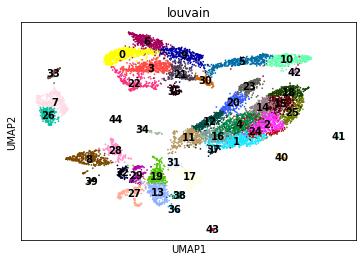

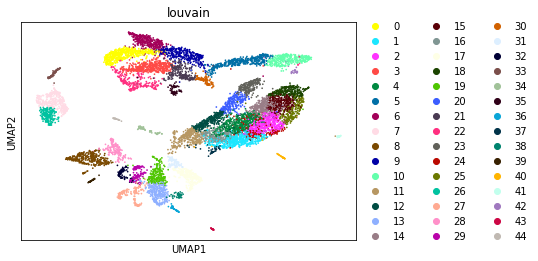

In [79]:
n_pcs = 75

all_cells_adata = sc.pp.log1p(raw_adata, copy=True) # new
sc.pp.highly_variable_genes(all_cells_adata,min_mean=0.1,max_mean=10,min_disp=0.5) # new
sc.pp.scale(all_cells_adata) # new
sc.tl.pca(all_cells_adata, use_highly_variable = True, n_comps=n_pcs, random_state=1) # new
sc.pp.neighbors(all_cells_adata, n_pcs=n_pcs, n_neighbors = 15, random_state=1) # new
sc.tl.umap(all_cells_adata, min_dist = 0.5, random_state=1)
sc.tl.louvain(all_cells_adata, resolution = 3, random_state=1)
sc.pl.umap(all_cells_adata, color=['louvain'], legend_loc='on data')
sc.pl.umap(all_cells_adata, color=['louvain'])


## decontamination_1

...


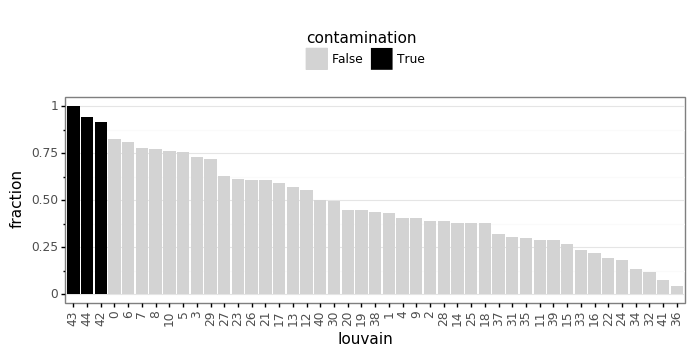

<ggplot: (-9223363297153661801)>


In [102]:
print('...')

# parse clusters 
input_adata = all_cells_adata
contam_stats = input_adata.obs.loc[:,['cell','louvain']]
contam_stats['well'] = [x.split('_')[0] for x in contam_stats.cell]
contam_stats['row'] = [x[0] for x in contam_stats.well]
contam_stats['col'] = [int(x[1:]) for x in contam_stats.well]
contam_stats['plate'] = [x.split('_')[1] for x in contam_stats.cell]
contam_stats = contam_stats.drop(['cell','well'], axis=1)
contam_stats = contam_stats.sort_values(['louvain','plate','row','col'])

# compute consective proportion
import more_itertools as mit
consec_df = pd.DataFrame()
for clust in set(contam_stats.louvain):
    input_clust = contam_stats[contam_stats.louvain==clust]
    wells_total = len(input_clust)
    series_total = 0
    n_plates = len(set(input_clust.plate))
    for plate in set(input_clust.plate):
        input_slice = input_clust[input_clust.plate==plate]

        for row in set(input_slice.row):
            row_slice = input_slice[input_slice.row == row]
            col_wells = row_slice.col.tolist()

            lol = [list(group) for group in mit.consecutive_groups(col_wells)]
            series_len = len([element for sublist in lol for element in sublist if len(sublist) > 1])

            series_total += series_len
    
    prop = series_total/wells_total
    consec_slice = pd.DataFrame({'fraction':[prop],
                                 'louvain':[clust],
                                 'n_well':[wells_total],
                                 'n_plates':[n_plates]
                                })
    consec_df = consec_df.append(consec_slice)
    
louvain_order = consec_df.sort_values('fraction', ascending=False).louvain.tolist()
consec_df['louvain'] = (consec_df['louvain']
                        .astype(str)
                        .astype(CategoricalDtype(louvain_order, ordered = True))
                       )

blacklist = ['42','43','44']
consec_df['contamination'] = [x in blacklist for x in consec_df['louvain']]
color_code_dict = {True:'#000000',
                  False:'#D3D3D3'}

plotnine.options.figure_size=(8,8)
plot = (ggplot(consec_df)
        + theme_bw()
        + theme(aspect_ratio=1/3,
                legend_position='top',
                axis_text_x=element_text(angle=90),
                panel_grid_major_x=element_blank()
               )
        + geom_bar(aes('louvain','fraction',fill='contamination'), 
                   stat = 'identity')
        + scale_fill_manual(values=color_code_dict)
       )

print(plot)


In [105]:
# # well series test
# cluster = '29'
# input_adata = all_cells_adata
# gene_n=10
# well_series_test(cluster, input_adata)
# input_adata.obs['coi'] = [x == cluster for x in input_adata.obs.louvain]
# print(set(input_adata.obs[input_adata.obs['coi'] == True].patient))
# sc.pl.umap(input_adata, color = ['coi','PMEL','KRT1','KRT15','n_genes','age'], ncols = 2
#           )

# sc.tl.rank_genes_groups(input_adata, groupby='louvain', groups=[cluster], method='wilcoxon',reference='rest')
# gene = [x[0] for x in input_adata.uns['rank_genes_groups']['names']]
# out = symbol2field(gene[:gene_n])
# output = [print(f'{idx}: ', 
#        x['query'],
#        '\n',x['summary']) if ('summary' in x.keys()) else print(f'{idx}: ', 
#                                                                 x['query'],
#                                                                 '\n','N/A') for idx, x in enumerate(out)]




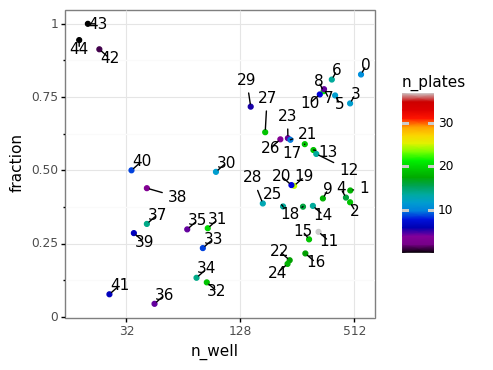

In [106]:
from adjustText import adjust_text

plotnine.options.figure_size=(4,4)
plot = (ggplot(consec_df)
        + theme_bw()
        + geom_point(aes('n_well','fraction',color='n_plates'))
        + geom_text(aes('n_well','fraction',label='louvain'))
        + scale_color_cmap('nipy_spectral')
        + scale_x_continuous(trans='log2')
       )

f = plot.draw()
for a in f.axes:
    texts = [t for t in  a.texts]
    adjust_text(texts,ax=a, arrowprops=dict(arrowstyle='-', color='#000000'),
#                 force_text=(0.1, 0.6),
#                 force_points=(0.5, 1),
#                 expand_text=(1.3, 1.3),
#                 expand_points=(1.3,4)
               )
    

In [107]:
blacklist_stats = contam_stats[[x in blacklist for x in contam_stats.louvain]]
blacklist_stats = (blacklist_stats
                   .loc[:,['louvain','plate']]
                   .groupby('louvain')
                   .count()
                   .rename(columns={'plate':'cell_count'})
                  )
blacklist_stats = blacklist_stats[blacklist_stats.cell_count>0]
blacklist_stats = blacklist_stats.reset_index()
blacklist_stats['louvain'] = [f'cluster_{x}' for x in blacklist_stats['louvain']]
blacklist_stats = blacklist_stats.set_index('louvain')
del blacklist_stats.index.name
display(blacklist_stats)


,cell_count
cluster_42,23
cluster_43,20
cluster_44,18


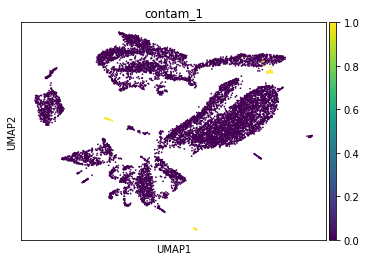

In [108]:
# compile contaminations
contam_list_1 = []
for x in blacklist:
    contam_list_1 = contam_list_1 + all_cells_adata.obs[all_cells_adata.obs.louvain == x].index.tolist()

# classify in all_cells_adata
input_adata = all_cells_adata
input_adata.obs['contam_1'] = [x in contam_list_1 for x in input_adata.obs.index]
sc.pl.umap(input_adata, color = 'contam_1')

# classify in raw_adata
raw_adata.obs['contam_1'] = [x in contam_list_1 for x in raw_adata.obs.index]


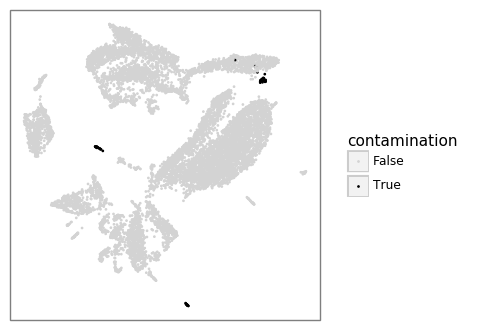

<ggplot: (8739703596194)>


In [109]:
class_ref = 'contam_1'
input_adata = all_cells_adata
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df['contamination'] = input_adata.obs[class_ref].values
color_code_dict = {True:'#000000',
                  False:'#D3D3D3'}

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank(),
                axis_text = element_blank(),
                axis_title = element_blank(),
                axis_ticks = element_blank(),
               )
        + geom_point(aes('xvar','yvar',color='contamination'), size = 0.1)
        + scale_color_manual(values=color_code_dict)
       )
print(plot)


... storing 'age_bin' as categorical
... storing 'plate' as categorical
... storing 'general_location' as categorical
... storing 'anatomical_location' as categorical
... storing 'race' as categorical
... storing 'sex' as categorical
... storing 'color' as categorical
... storing 'patient' as categorical
... storing 'cycling_cell' as categorical


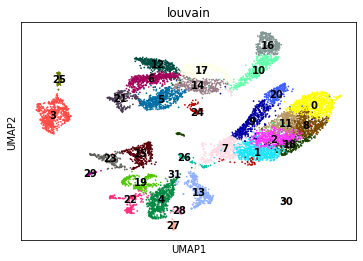

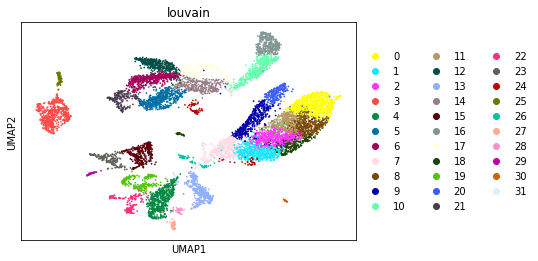

In [110]:
decontam_adata = raw_adata[raw_adata.obs['contam_1'] == False]
decontam_adata = sc.pp.log1p(decontam_adata, copy=True) # new
sc.pp.highly_variable_genes(decontam_adata,min_mean=0.1,max_mean=10,min_disp=0.5) # new
sc.pp.scale(decontam_adata) # new
sc.tl.pca(decontam_adata, use_highly_variable = True, n_comps=n_pcs, random_state=1) # new
sc.pp.neighbors(decontam_adata, n_pcs=n_pcs, n_neighbors=15, random_state=1) # new
sc.tl.umap(decontam_adata, min_dist = 0.5, random_state=1)
sc.tl.louvain(decontam_adata, resolution = 2, random_state=1) # 4
sc.pl.umap(decontam_adata, color=['louvain'], legend_loc='on data')
sc.pl.umap(decontam_adata, color=['louvain'])


,well,plate
16,B11,B003591
40,F17,B003591
41,F4,B003591
53,K4,B003591


,well,plate
31,D3,B003819


,well,plate
6,I21,B001439
4,J10,B001439
5,N1,B001439


,well,plate
68,C8,B002549
72,F9,B002549


,well,plate
70,E4,B002550


,well,plate
0,J2,B001564


,well,plate
2,E14,B000771
3,F22,B000771


,well,plate
67,B9,B002522
69,E10,B002522
71,F18,B002522
73,I8,B002522
75,N9,B002522


,well,plate
1,I16,B003520


,well,plate
74,L5,B002524


,well,plate
10,A14,B003605
11,A15,B003605
12,A17,B003605
15,A6,B003605
17,B11,B003605
19,B5,B003605
20,B9,B003605
21,C10,B003605
24,C21,B003605
26,C5,B003605


,well,plate
8,F21,B001566


,well,plate
7,I2,B003104


,well,plate
9,A11,B003817
13,A18,B003817
14,A21,B003817
18,B14,B003817
22,C11,B003817
23,C18,B003817
25,C21,B003817
27,C7,B003817
29,D11,B003817
30,D13,B003817


,well,plate
66,P3,B002530


,well,plate
48,J4,B003832
61,O4,B003832


{'9.5WK02', '10WK03', 'A1011L', '18WKM06', '12WK05', 'A1046M', 'A1038LM', '12WKM01', 'A1025L', 'A1033M'}


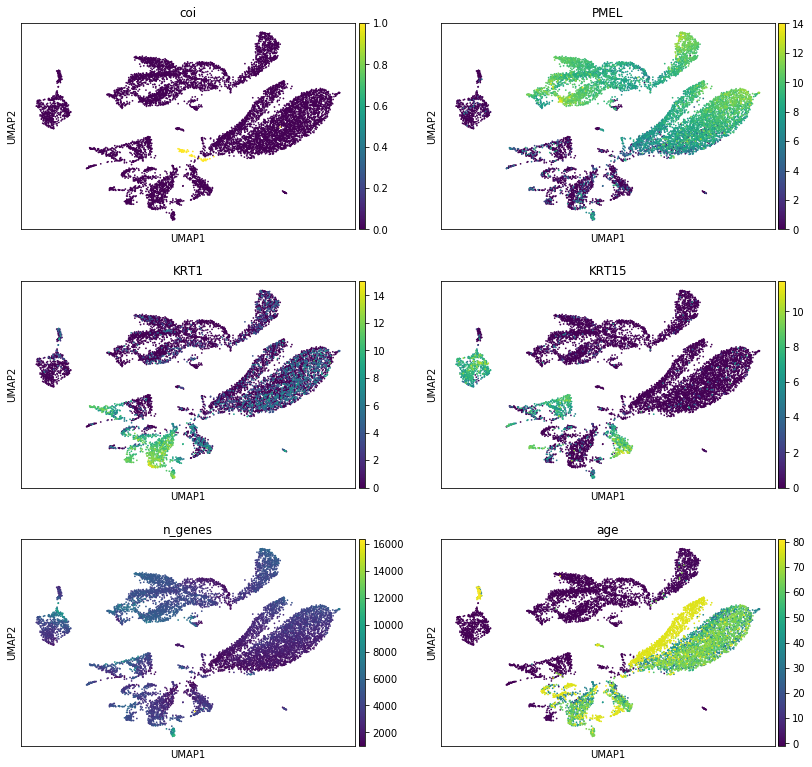

querying 1-10...done.
Finished.
0:  TYROBP 
 This gene encodes a transmembrane signaling polypeptide which contains an immunoreceptor tyrosine-based activation motif (ITAM) in its cytoplasmic domain. The encoded protein may associate with the killer-cell inhibitory receptor (KIR) family of membrane glycoproteins and may act as an activating signal transduction element. This protein may bind zeta-chain (TCR) associated protein kinase 70kDa (ZAP-70) and spleen tyrosine kinase (SYK) and play a role in signal transduction, bone modeling, brain myelination, and inflammation. Mutations within this gene have been associated with polycystic lipomembranous osteodysplasia with sclerosing leukoencephalopathy (PLOSL), also known as Nasu-Hakola disease. Its putative receptor, triggering receptor expressed on myeloid cells 2 (TREM2), also causes PLOSL. Multiple alternative transcript variants encoding distinct isoforms have been identified for this gene. [provided by RefSeq, Mar 2010].
1:  AIF1 
 Th

In [111]:
# # well series test
# cluster = '26'
# input_adata = decontam_adata
# gene_n=10
# well_series_test(cluster, input_adata)
# input_adata.obs['coi'] = [x == cluster for x in input_adata.obs.louvain]
# print(set(input_adata.obs[input_adata.obs['coi'] == True].patient))
# sc.pl.umap(input_adata, color = ['coi','PMEL','KRT1','KRT15','n_genes','age'], ncols = 2
#           )

# sc.tl.rank_genes_groups(input_adata, groupby='louvain', groups=[cluster], method='wilcoxon',reference='rest')
# gene = [x[0] for x in input_adata.uns['rank_genes_groups']['names']]
# out = symbol2field(gene[:gene_n])
# output = [print(f'{idx}: ', 
#        x['query'],
#        '\n',x['summary']) if ('summary' in x.keys()) else print(f'{idx}: ', 
#                                                                 x['query'],
#                                                                 '\n','N/A') for idx, x in enumerate(out)]




## low-quality and doublet filter
low-quality (low n_genes)

doublet (co-expression of PMEL and KRT1/KRT15)

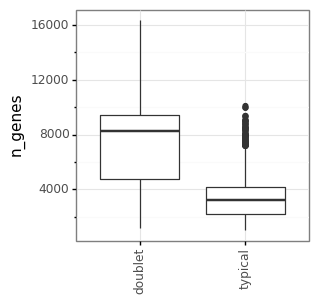

<ggplot: (8739702213850)>

In [113]:
# n_genes of filtered cells
low_quality_cluster = []
doublet_cluster = ['27']

input_adata = decontam_adata
ngene_df = input_adata.obs.loc[:,['louvain','n_genes','n_counts']]
ngene_df['coi'] = ['low_quality' if x in low_quality_cluster \
                   else 'doublet' if x in doublet_cluster \
                   else 'typical' for x in ngene_df.louvain]
# add T-cell doublets
plateoi = 'B003580'
manual_doublet = [f'I{x}_{plateoi}' for x in range(7,23)]
ngene_df['coi'] = ['doublet' if x in manual_doublet else y for x,y in zip(ngene_df.index, ngene_df.coi)]

plotnine.options.figure_size = (3,3)
plot = (ggplot(ngene_df)
        + theme_bw()
        + theme(axis_title_x = element_blank(),
                axis_text_x = element_text(angle=90)
               )
        + geom_boxplot(aes('coi','n_genes'))
       )
plot


In [114]:
filter_stats=pd.concat([ngene_df.loc[:,['coi','n_genes']].groupby('coi').count().rename(columns={'n_genes':'cell_count'}),
           ngene_df.loc[:,['coi','n_genes']].groupby('coi').mean().rename(columns={'n_genes':'mean_gene_count'}),
           ngene_df.loc[:,['coi','n_genes']].groupby('coi').median().rename(columns={'n_genes':'median_gene_count'}),
           ngene_df.loc[:,['coi','n_counts']].groupby('coi').mean().rename(columns={'n_counts':'mean_read_count'}),
           ngene_df.loc[:,['coi','n_counts']].groupby('coi').median().rename(columns={'n_counts':'median_read_count'}),
          ], axis=1).astype(int)
del filter_stats.index.name
display(filter_stats)


,cell_count,mean_gene_count,median_gene_count,mean_read_count,median_read_count
doublet,61,7107,8265,2387188,803505
typical,10031,3286,3221,1031673,606141


In [115]:
# compile contaminations
contam_hi_ngenes = decontam_adata.obs[decontam_adata.obs.louvain == doublet_cluster].index.tolist()+manual_doublet
contam_lo_ngenes = decontam_adata.obs[decontam_adata.obs.louvain == low_quality_cluster].index.tolist()


full_contam = contam_list_1 + contam_hi_ngenes + contam_lo_ngenes
full_contam = list(set(full_contam))

# classify in full_adata
input_adata = decontam_adata
input_adata.obs['contam_2'] = [x in full_contam for x in input_adata.obs.index]

# classify in raw_adata
raw_adata.obs['contam_2'] = [x in full_contam for x in raw_adata.obs.index]


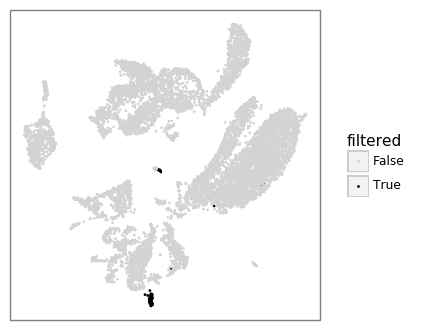

<ggplot: (8739703060109)>


In [116]:
class_ref = 'contam_2'
input_adata = decontam_adata
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df['filtered'] = input_adata.obs[class_ref].values
color_code_dict = {True:'#000000',
                  False:'#D3D3D3'}

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank(),
                axis_text = element_blank(),
                axis_title = element_blank(),
                axis_ticks = element_blank(),
               )
        + geom_point(aes('xvar','yvar',color='filtered'), size = 0.1)
        + scale_color_manual(values=color_code_dict)
       )
print(plot)


... storing 'age_bin' as categorical
... storing 'plate' as categorical
... storing 'general_location' as categorical
... storing 'anatomical_location' as categorical
... storing 'race' as categorical
... storing 'sex' as categorical
... storing 'color' as categorical
... storing 'patient' as categorical
... storing 'cycling_cell' as categorical


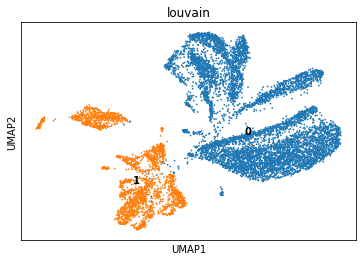

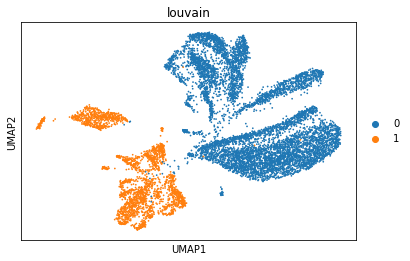

In [117]:
full_adata = raw_adata[raw_adata.obs['contam_2'] == False]
full_adata = sc.pp.log1p(full_adata, copy=True) # new
sc.pp.highly_variable_genes(full_adata,min_mean=0.1,max_mean=10,min_disp=0.5) # new
sc.pp.scale(full_adata) # new
sc.tl.pca(full_adata, use_highly_variable = True, n_comps=n_pcs, random_state=1) # new
sc.pp.neighbors(full_adata, n_pcs=n_pcs, n_neighbors=65, random_state=1) # new
sc.tl.umap(full_adata, min_dist = 0.5, random_state=1)
sc.tl.louvain(full_adata, resolution = 0.02, random_state=1)
sc.pl.umap(full_adata, color=['louvain'], legend_loc='on data')
sc.pl.umap(full_adata, color=['louvain'])


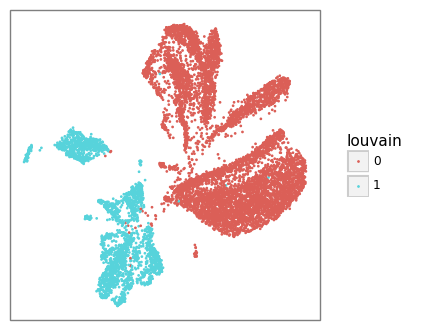

<ggplot: (8739699213204)>


In [118]:
class_ref = 'louvain'
input_adata = full_adata
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df[class_ref] = input_adata.obs[class_ref].values
color_code_dict = {True:'#000000',
                  False:'#D3D3D3'}

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank(),
                axis_text = element_blank(),
                axis_title = element_blank(),
                axis_ticks = element_blank(),
               )
        + geom_point(aes('xvar','yvar',color=class_ref), size = 0.1)
       )
print(plot)


# iterative re-clustering

## cluster_0

... storing 'age_bin' as categorical
... storing 'plate' as categorical
... storing 'general_location' as categorical
... storing 'anatomical_location' as categorical
... storing 'race' as categorical
... storing 'sex' as categorical
... storing 'color' as categorical
... storing 'patient' as categorical
... storing 'cycling_cell' as categorical


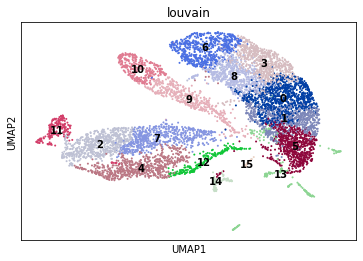

In [132]:
coi = full_adata[full_adata.obs.louvain == '0'].obs.index.tolist()
raw_adata.obs['recluster'] = [x in coi for x in raw_adata.obs.index]
recluster_0 = raw_adata[raw_adata.obs['recluster'] == True]
recluster_0 = sc.pp.log1p(recluster_0, copy=True) # new
sc.pp.highly_variable_genes(recluster_0,min_mean=0.1,max_mean=10,min_disp=0.5) # new
sc.pp.scale(recluster_0) # new
sc.tl.pca(recluster_0, use_highly_variable = True, n_comps=n_pcs, random_state=1) # new
sc.pp.neighbors(recluster_0, n_pcs=n_pcs, n_neighbors=15, random_state=1) # new
sc.tl.umap(recluster_0, min_dist = 0.5, random_state=1)
sc.tl.louvain(recluster_0, resolution = 0.75, random_state=1)
sc.pl.umap(recluster_0, color=['louvain'], legend_loc='on data')


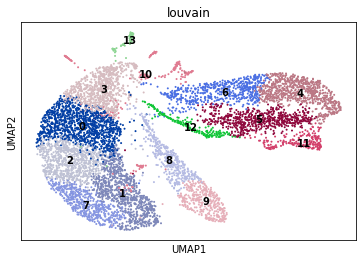

In [143]:
sc.pp.neighbors(recluster_0, n_pcs=n_pcs, n_neighbors=25, random_state=1) # new
sc.tl.umap(recluster_0, min_dist = 0.5, random_state=1)
sc.tl.louvain(recluster_0, resolution = 0.75, random_state=1)
sc.pl.umap(recluster_0, color=['louvain'], legend_loc='on data')


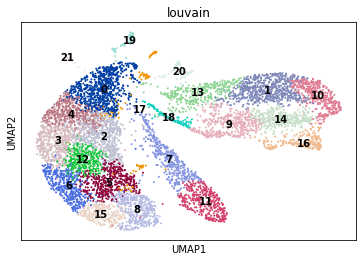

In [146]:
sc.tl.louvain(recluster_0, resolution = 1.5, random_state=1)
sc.pl.umap(recluster_0, color=['louvain'], legend_loc='on data')


In [152]:
# ## well series test
# cluster = '19'
# gene_n = 10
# input_adata = recluster_0
# well_series_test(cluster, input_adata)
# input_adata.obs['coi'] = [x == cluster for x in input_adata.obs.louvain]
# print(set(input_adata.obs[input_adata.obs['coi'] == True].patient))
# sc.pl.umap(input_adata, color = ['coi','PMEL','KRT1','KRT15','n_genes','age'], ncols = 2
#           )

# sc.tl.rank_genes_groups(input_adata, groupby='louvain', groups=[cluster], method='wilcoxon',reference='rest')
# gene = [x[0] for x in input_adata.uns['rank_genes_groups']['names']]
# out = symbol2field(gene[:gene_n])
# output = [print(f'{idx}: ', 
#        x['query'],
#        '\n',x['summary']) if ('summary' in x.keys()) else print(f'{idx}: ', 
#                                                                 x['query'],
#                                                                 '\n','N/A') for idx, x in enumerate(out)]


... storing 'named_cluster' as categorical


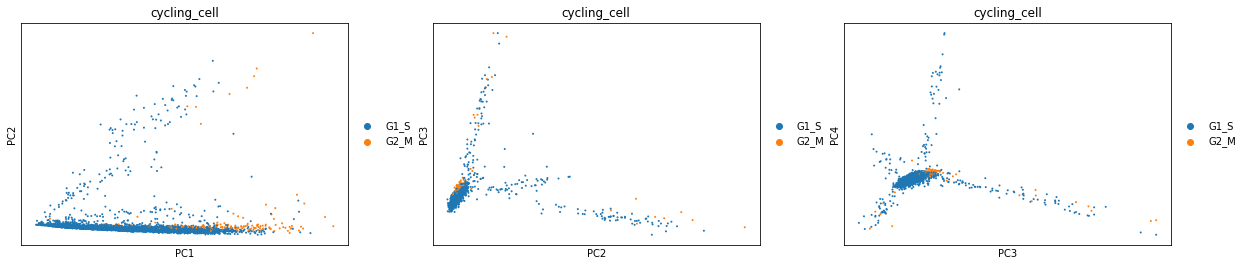

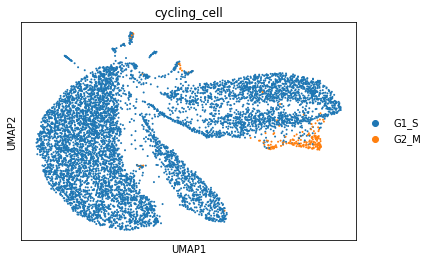

In [151]:
# append named_cluster
input_adata = recluster_0
anno_dict_0 = {'20':'follicular_mel',
               '19':'dendritic',
               '21':'mast',
              }
for x in [x for x in set(input_adata.obs.louvain) \
          if x not in anno_dict_0.keys()]:
    anno_dict_0[x] = f'mel_{x}'
    
input_adata.obs['named_cluster'] = [anno_dict_0.get(x) for x in input_adata.obs.louvain]

# update cycling cell
input_adata.obs.named_cluster = [f'cyc_{x}' if y == 'G2_M' \
                                 else x \
                                 for x,y in zip(input_adata.obs.named_cluster,
                                                    input_adata.obs.cycling_cell)]
# plot cycling cell output
sc.pl.pca(input_adata, components=['1,2', '2,3','3,4'], color=['cycling_cell'])
sc.pl.umap(input_adata, color=['cycling_cell'], cmap='nipy_spectral')


###  recluster hair follicle cluster

... storing 'age_bin' as categorical
... storing 'plate' as categorical
... storing 'general_location' as categorical
... storing 'anatomical_location' as categorical
... storing 'race' as categorical
... storing 'sex' as categorical
... storing 'color' as categorical
... storing 'patient' as categorical
... storing 'cycling_cell' as categorical


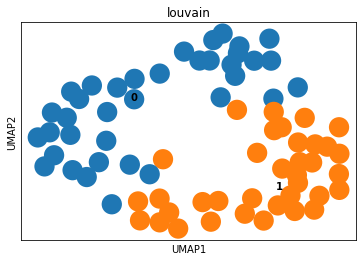

In [153]:
n_pcs = 15
coi = recluster_0[recluster_0.obs.louvain == '20'].obs.index.tolist()
raw_adata.obs['recluster'] = [x in coi for x in raw_adata.obs.index]
recluster_0_clust8 = raw_adata[raw_adata.obs['recluster'] == True]
recluster_0_clust8 = sc.pp.log1p(recluster_0_clust8, copy=True) # new
sc.pp.highly_variable_genes(recluster_0_clust8,min_mean=0.1,max_mean=10,min_disp=0.5) # new
sc.pp.scale(recluster_0_clust8) # new
sc.tl.pca(recluster_0_clust8, use_highly_variable = True, n_comps=n_pcs, random_state=1) # new
sc.pp.neighbors(recluster_0_clust8, n_pcs=n_pcs, n_neighbors=10, random_state=1) # new
sc.tl.umap(recluster_0_clust8, min_dist = 0.5, random_state=1)
sc.tl.louvain(recluster_0_clust8, resolution = 0.3, random_state=1)
sc.pl.umap(recluster_0_clust8, color=['louvain'], legend_loc='on data')



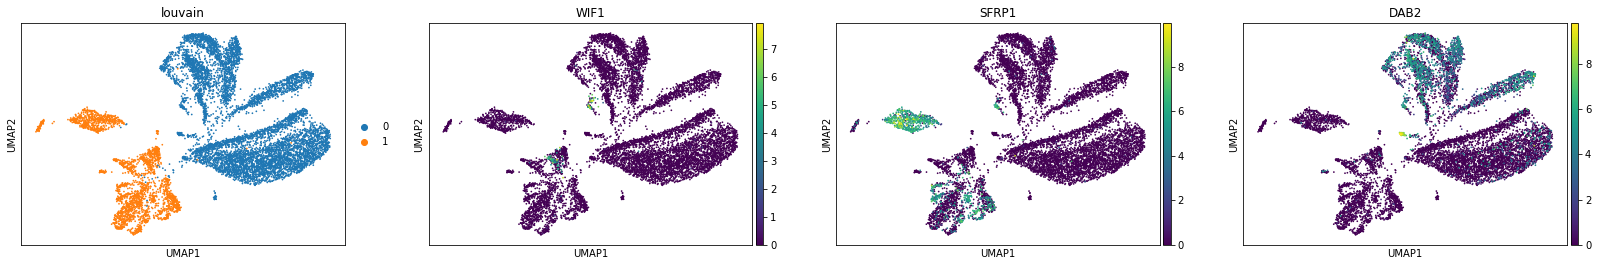

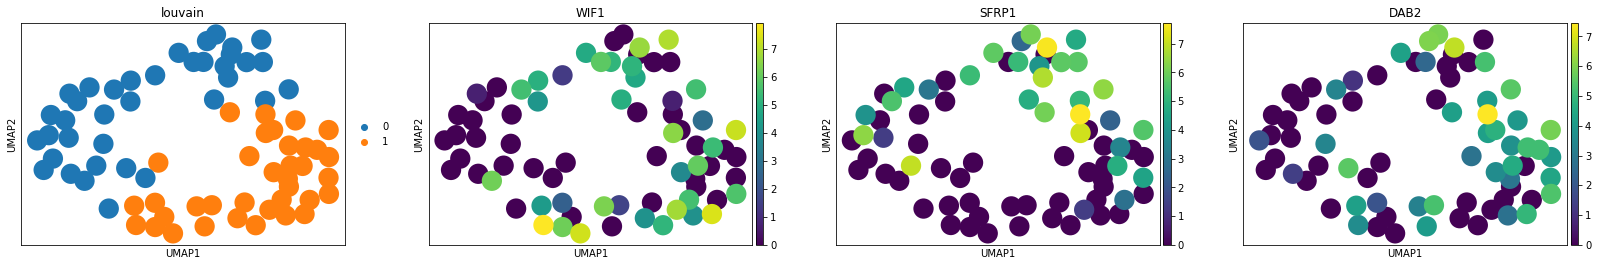

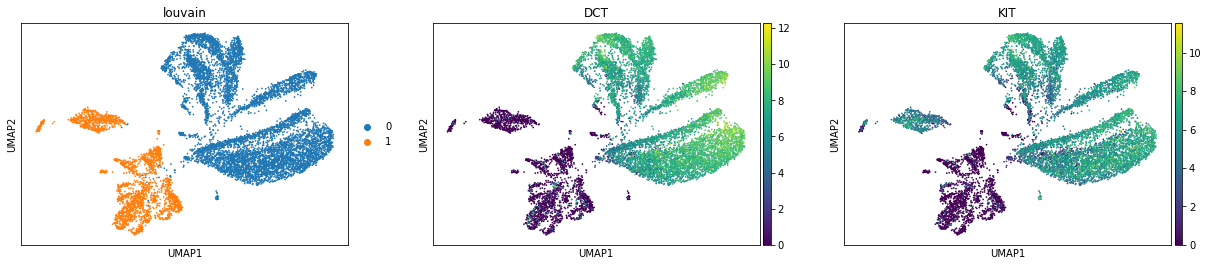

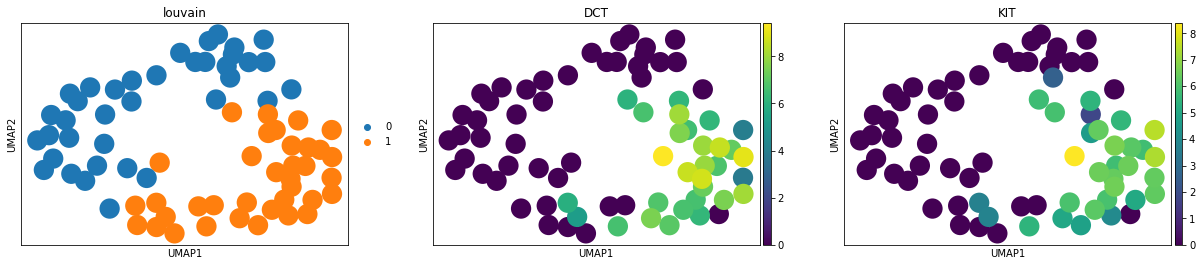

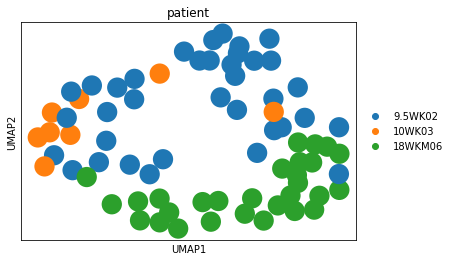

In [154]:
#ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3582991/

gois = ['WIF1','SFRP1','DAB2']
sc.pl.umap(full_adata, color=['louvain']+gois)
sc.pl.umap(recluster_0_clust8, color=['louvain']+gois)

gois = ['DCT','KIT']
sc.pl.umap(full_adata, color=['louvain']+gois)
sc.pl.umap(recluster_0_clust8, color=['louvain']+gois)

sc.pl.umap(recluster_0_clust8, color = ['patient'], ncols = 1)

... storing 'named_cluster' as categorical


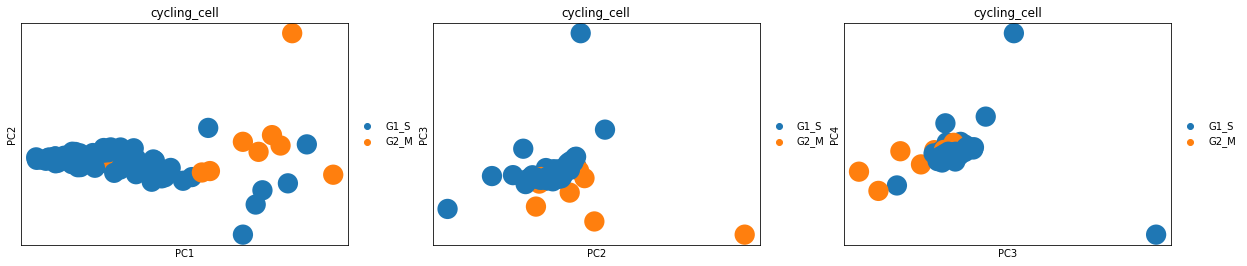

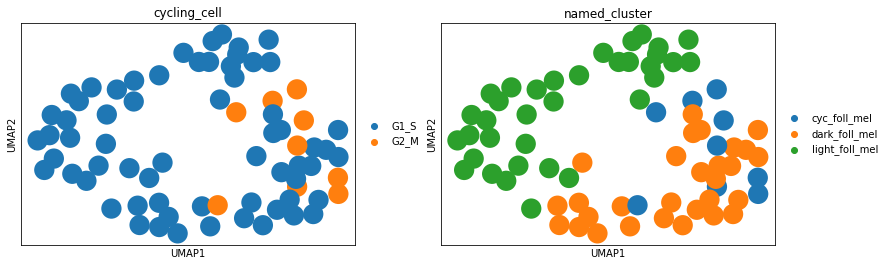

In [156]:
# append named_cluster
input_adata = recluster_0_clust8
anno_dict_foll = {'1':'dark_foll_mel',
               '0':'light_foll_mel',
              }

# add updated labels
input_adata.obs['named_cluster'] = [anno_dict_foll.get(x) for x in input_adata.obs.louvain]

# update cycling cell
input_adata.obs.named_cluster = [f'cyc_foll_mel' if y == 'G2_M' \
                                 else x \
                                 for x,y in zip(input_adata.obs.named_cluster,
                                                    input_adata.obs.cycling_cell)]

# plot cycling cell output
sc.pl.pca(input_adata, components=['1,2', '2,3','3,4'], color=['cycling_cell'])
sc.pl.umap(input_adata, color=['cycling_cell','named_cluster'], cmap='nipy_spectral')

# update recluster_0
ref_adata = recluster_0[recluster_0.obs.louvain != '20']
rename_df = (pd.DataFrame(ref_adata.obs.loc[:,'named_cluster'])
             .append(pd.DataFrame(input_adata.obs.loc[:,'named_cluster'])))
named_cluster_df = pd.merge(pd.DataFrame(recluster_0.obs.index).rename(columns = {0:'index'}),
                          rename_df.loc[:,['named_cluster']].reset_index(),
                          'left',
                          'index')
recluster_0.obs['named_cluster'] = named_cluster_df.named_cluster.tolist()  


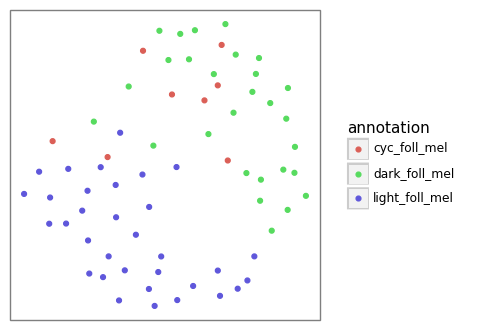

<ggplot: (-9223363283364942974)>


In [83]:
class_ref = 'named_cluster'
input_adata = recluster_0_clust8
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df['annotation'] = input_adata.obs[class_ref].values

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank(),
                axis_text = element_blank(),
                axis_title = element_blank(),
                axis_ticks = element_blank(),
               )
        + geom_point(aes('xvar','yvar',color='annotation'))
       )
print(plot)

## cluster_1

... storing 'age_bin' as categorical
... storing 'plate' as categorical
... storing 'general_location' as categorical
... storing 'anatomical_location' as categorical
... storing 'race' as categorical
... storing 'sex' as categorical
... storing 'color' as categorical
... storing 'patient' as categorical
... storing 'cycling_cell' as categorical


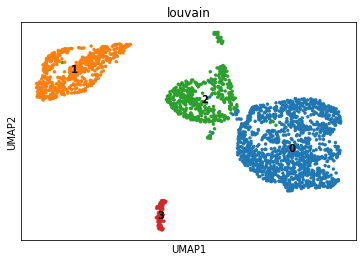

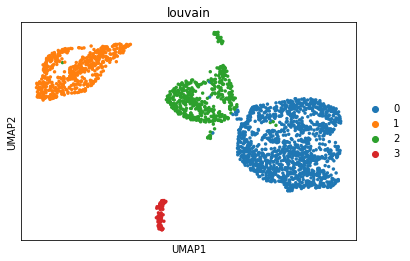

In [157]:
coi = full_adata[full_adata.obs.louvain == '1'].obs.index.tolist()
raw_adata.obs['recluster'] = [x in coi for x in raw_adata.obs.index]
recluster_1 = raw_adata[raw_adata.obs['recluster'] == True]
recluster_1 = sc.pp.log1p(recluster_1, copy=True) # new
sc.pp.highly_variable_genes(recluster_1,min_mean=0.1,max_mean=10,min_disp=0.5) # new
sc.pp.scale(recluster_1) # new
sc.tl.pca(recluster_1, use_highly_variable = True, n_comps=n_pcs, random_state=1) # new
sc.pp.neighbors(recluster_1, n_pcs=n_pcs, n_neighbors=35, random_state=1) # new
sc.tl.umap(recluster_1, min_dist = 0.5, random_state=1)
sc.tl.louvain(recluster_1, resolution = 0.1, random_state=1)
sc.pl.umap(recluster_1, color=['louvain'], legend_loc='on data')
sc.pl.umap(recluster_1, color=['louvain'])


... storing 'named_cluster' as categorical


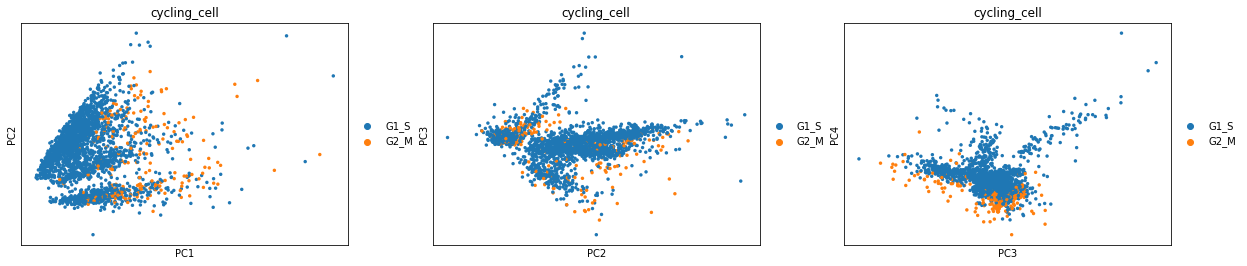

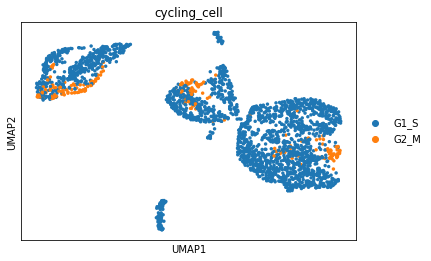

In [158]:
# append named_cluster
input_adata = recluster_1
anno_dict_krt = {'0':'krt_0',
               '1':'eccrine_0',
               '2':'krt_1',
               '3':'eccrine_1',
              }
# full_adata.obs['named_cluster'] = [f'mel_{x}' if x not in anno_dict_1.keys() \
#                                              else '{}'.format(anno_dict_0[x]) \
#                                              for x in full_adata.obs.louvain]

input_adata.obs['named_cluster'] = [anno_dict_krt.get(x) for x in input_adata.obs.louvain]

# update cycling cell
input_adata.obs.named_cluster = [f'cyc_{x}' if y == 'G2_M' \
                                 else x \
                                 for x,y in zip(input_adata.obs.named_cluster,
                                                    input_adata.obs.cycling_cell)]
# plot cycling cell output
sc.pl.pca(input_adata, components=['1,2', '2,3','3,4'], color=['cycling_cell'])
sc.pl.umap(input_adata, color=['cycling_cell'], cmap='nipy_spectral')


# annotations

## merge recluster annotations

... storing 'named_cluster' as categorical


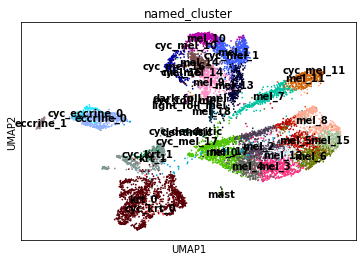

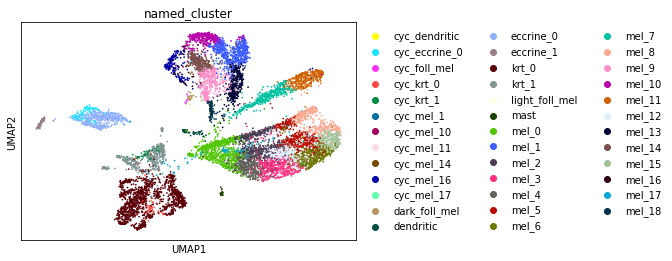

In [159]:
recluster_merge = recluster_1.obs.append(recluster_0.obs)
named_cluster_df = pd.merge(pd.DataFrame(full_adata.obs.index).rename(columns = {0:'index'}),
                          recluster_merge.loc[:,['named_cluster']].reset_index(),
                          'left',
                          'index')

full_adata.obs['named_cluster'] = named_cluster_df.named_cluster.tolist()
sc.pl.umap(full_adata, color = 'named_cluster', legend_loc = 'on data')
sc.pl.umap(full_adata, color = 'named_cluster')


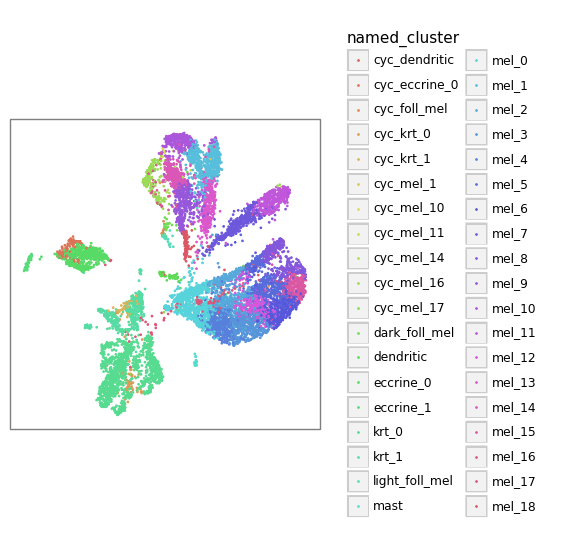

<ggplot: (8739702812196)>


In [160]:
class_ref = 'named_cluster'
input_adata = full_adata
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df[class_ref] = input_adata.obs[class_ref].values

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank(),
                axis_text = element_blank(),
                axis_title = element_blank(),
                axis_ticks = element_blank(),
               )
        + geom_point(aes('xvar','yvar',color=class_ref), size = 0.1)
       )
print(plot)

## label updates

In [161]:
# update labels
dev_stage_order = ['fet','neo','adt']
subtypes_order = ['acral','foreskin','cutaneous']
acral_subtype_order = ['acral','not_acral']
foreskin_subtype_order = ['foreskin','not_foreskin']
dev_subtype_order = ['fet_acral','fet_cutaneous','neo_foreskin','adt_acral','adt_cutaneous']

for input_adata in [full_adata,recluster_0,recluster_1]:
    input_adata.obs['true_year'] = [float(x.split('WK')[0])/52 if len(x.split('WK')[0]) <= 3 else np.nan for x in input_adata.obs.patient]
    input_adata.obs['true_year'] = [y+(9/12) if np.isnan(x) else x for x,y in zip(input_adata.obs['true_year'], input_adata.obs['age']) ]

    input_adata.obs['dev_stage'] = ['adt' if x > 0 else 'neo' if x == 0 else 'fet' for x in input_adata.obs.age]
    input_adata.obs['subtypes'] = [x if x in ['acral','foreskin'] else 'cutaneous' for x in input_adata.obs.general_location]
    input_adata.obs['acral_subtype'] = [x if x == 'acral' else 'not_acral' for x in input_adata.obs['subtypes']]
    input_adata.obs['dev_subtype'] = [f'{x}_{y}' for x,y in zip(input_adata.obs.dev_stage, input_adata.obs.subtypes)]

    for i in ['dev_stage', 'subtypes', 'acral_subtype' ,'dev_subtype']:
        input_adata.obs[i] =  (input_adata
                                 .obs[i]
                                 .astype(str)
                               .astype(CategoricalDtype(eval(f'{i}_order'), ordered = True))
                              )  
        
    input_adata.obs['class_1'] = ['_'.join(x.split('_')[:-1]) if x.split('_')[-1].isdigit() \
                                      else '_'.join(x.split('_')) \
                                      for x in input_adata.obs['named_cluster']]
     

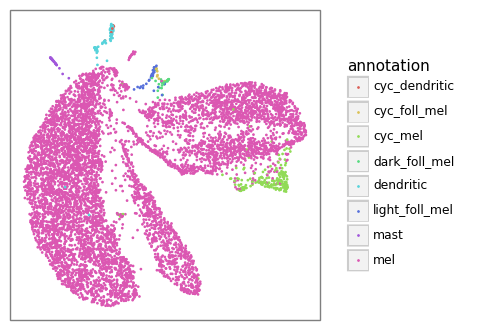

<ggplot: (8739695408332)>


In [162]:
class_ref = 'class_1'
input_adata = recluster_0
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df['annotation'] = input_adata.obs[class_ref].values

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank(),
                axis_text = element_blank(),
                axis_title = element_blank(),
                axis_ticks = element_blank(),
               )
        + geom_point(aes('xvar','yvar',color='annotation'), size = 0.1)
       )
print(plot)

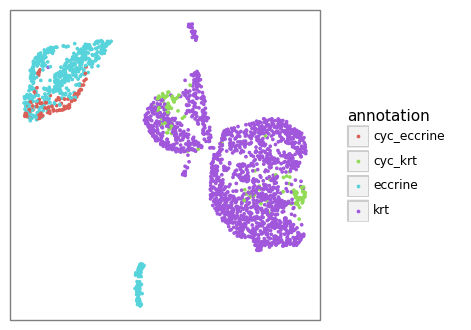

<ggplot: (8739693857442)>


In [163]:
class_ref = 'class_1'
input_adata = recluster_1
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df['annotation'] = input_adata.obs[class_ref].values

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank(),
                axis_text = element_blank(),
                axis_title = element_blank(),
                axis_ticks = element_blank(),
               )
        + geom_point(aes('xvar','yvar',color='annotation'), size = 0.5)
       )
print(plot)

## DE genes as function of annotation

In [164]:
input_adata = full_adata
DE_df = pd.DataFrame()
type_order = ['mel',
                'cyc_mel',
                'dark_foll_mel',
                'light_foll_mel',
                'cyc_foll_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
#                 'T_cell',
             ]
for x in tqdm.tqdm(type_order):
    tmpdf = pd.DataFrame()
    tmpdf['gene'] = fast_DE(input_adata, x,'class_1')
    tmpdf['class_1'] = x
    DE_df = DE_df.append(tmpdf)
    
DE_df['class_1'] = (DE_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order, ordered=True))
                     )
    
gene_order = DE_df[~DE_df.gene.duplicated(keep='first')].gene.tolist()
    


  0%|          | 0/12 [00:00<?, ?it/s]... storing 'class_1' as categorical

100%|██████████| 12/12 [03:02<00:00, 15.10s/it]

## Marker gene citations

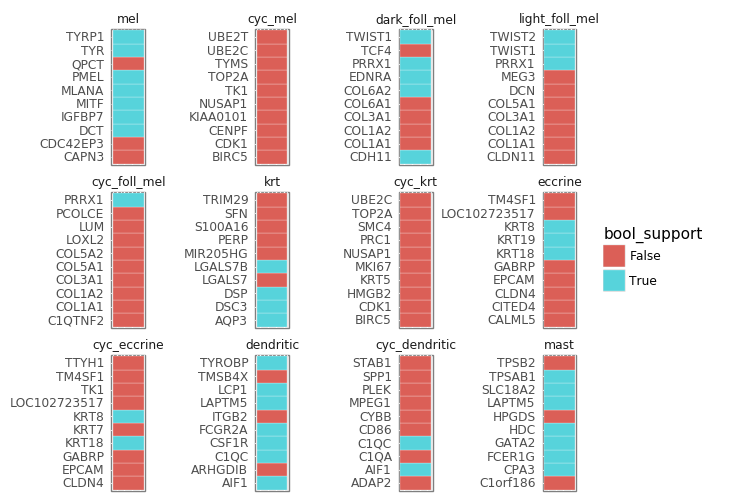

<ggplot: (8739704008140)>


,class_1,cite
0,mel,10.1101/cshperspect.a017046
1,cyc_mel,10.1101/cshperspect.a017046
0,krt,10.1016/j.celrep.2018.09.006
1,cyc_krt,10.1016/j.celrep.2018.09.006
0,krt,10.1038/jid.2010.395
1,cyc_krt,10.1038/jid.2010.395
0,eccrine,10.1111/exd.12773
1,cyc_eccrine,10.1111/exd.12773
0,dendritic,10.1038/jid.2013.375
1,cyc_dendritic,10.1038/jid.2013.375


In [165]:
cite_dict = {'10.1101/cshperspect.a017046':['TYR','TYRP1','DCT','MITF','IGFBP7','PMEL','MLANA'], # mel
             '10.1016/j.celrep.2018.09.006':['DSP','DSC3','LGALS7B'], # krt
             '10.1038/jid.2010.395':['AQP3'], # krt
             '10.1111/exd.12773':['KRT18','KRT19','KRT8'], # eccrine
             '10.1038/jid.2013.375':['FCGR2A','FCER1G','C1QC','LAPTM5','CSF1R','AIF1'], # dendritic
             '10.1182/blood-2013-02-483792':['LAPTM5','FCER1G','SLC18A2','GATA2'], # mast
             '10.1084/jem.20170910':['TPSAB1','CPA3','HDC','GATA2'], # mast
             '10.1038/s41598-017-01468-y':['TYROBP','CSF1R','LAPTM5','FCGR2A','FCER1G','LCP1','CD4','C1QC',
                                           'FYB','CORO1A','CXCR4','CD3D','CD52','PTPRCAP','IL32'], # T cell
#              '10.1158/0008-5472.CAN-09-0783':['COL1A1','COL3A1','COL1A2',
#                                               'PRRX1','COL6A2','COL21A1','MEG3'] # nevus 
             '10.1371/journal.pgen.1008034':['EDNRA','PRRX1','CDH11','COL6A2','TWIST1','TWIST2'], # msc
#              '10.1371/journal.pone.0115717':['DCN','CLDN11','OLFML3'] # fibroblast
            }

cite_df = pd.DataFrame()
for key,value in cite_dict.items():
    df_slice = pd.DataFrame({'gene':value})
    df_slice['cite'] = key
    cite_df = cite_df.append(df_slice)    
DE_cite_df = pd.merge(DE_df, cite_df, 'left', 'gene')

cite2class = {'10.1101/cshperspect.a017046':['mel','cyc_mel'],
              '10.1016/j.celrep.2018.09.006':['krt','cyc_krt'],
              '10.1038/jid.2010.395':['krt','cyc_krt'],
              '10.1111/exd.12773':['eccrine','cyc_eccrine'],
              '10.1038/jid.2013.375':['dendritic','cyc_dendritic'],
              '10.1038/s41598-017-01468-y':['dendritic','cyc_dendritic','T_cell','cyc_T_cell'],
              '10.1182/blood-2013-02-483792':['mast','cyc_mast'],
              '10.1084/jem.20170910':['mast','cyc_mast'],
              '10.1371/journal.pgen.1008034':['light_foll_mel','dark_foll_mel','cyc_foll_mel'],
             }

DE_cite_df['support'] = [y in cite2class.get(x) if x is not np.nan \
                         else False for x,y in zip(DE_cite_df.cite, DE_cite_df.class_1)]
DE_cite_df['class_1'] = (DE_cite_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order, ordered=True))
                     )
plot_df = pd.DataFrame(DE_cite_df.groupby(['class_1','gene'])['support'].sum()).reset_index()
plot_df['bool_support'] = [x > 0 for x in plot_df['support']]
plot_df['xvar'] = 0
plot_df['class_1'] = (plot_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order, ordered=True))
                     )
plot_df = plot_df.dropna()

plotnine.options.figure_size = (6,6)
plot = (ggplot(plot_df)
        + theme_bw()
        + theme(panel_spacing_x = 1.1,
                axis_text_x = element_blank(),
                strip_background = element_blank(),
                axis_ticks = element_blank()
               )
        + geom_tile(aes('xvar','gene', fill = 'bool_support'), color = 'white')
        + facet_wrap('~class_1', scales = 'free')
        + labs(x = '', y = '')
#         + scale_fill_manual(values = ['red','green','blue','orange','purple','yellow','pink','brown','grey','white'])
       )
print(plot)

# table of cell annotations and citations
cite2class_df = pd.DataFrame()
for key,value in cite2class.items():
    df_slice = pd.DataFrame({'class_1':value})
    df_slice['cite'] = key
    cite2class_df = cite2class_df.append(df_slice)
cite2class_df['class_1'] = (cite2class_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order, ordered=True))
                     )
display(cite2class_df.dropna())


# save

In [166]:
# pickle adatas
for objname in ['raw_adata','full_adata',
                'recluster_0','recluster_1', 'DE_df']:
    pickle.dump(eval(objname), open( f"{wkdir}/{objname}.p", "wb" ) )
    syscmd = f'aws s3 cp {wkdir}/{objname}.p s3://{s3dir}/'
    subprocess.run(syscmd.split(' '))